In [1]:
from ipywidgets import widgets, interact, fixed
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import locale
import sys 
import os 
# Add the higher-level directory containing the module to the sys.path 
module_path = os.path.abspath(os.path.join('..', 'libs')) 
if module_path not in sys.path: 
    sys.path.append(module_path) # Import the class from the module from your_module import


from ReportData import *
from ReportGraphs import *

# Set locale to US English for currency formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
# setup reports class
ReportsClass = ReportData(copy_file=False,use_copied_file=False)

## FIRE Tracker

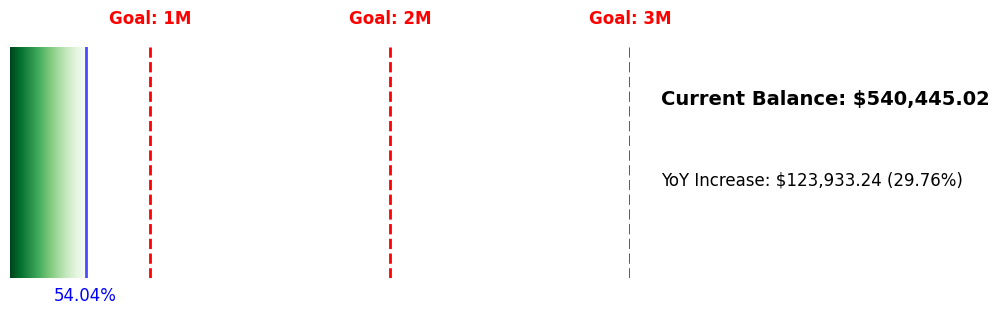

In [2]:
current_balance, previous_balance, goal_balances, goal_dates, goal_ages = ReportsClass.get_fire_balances()
fire_progress_bar(current_balance, previous_balance, goal_balances, goal_dates, goal_ages)

## Current Balance By Type

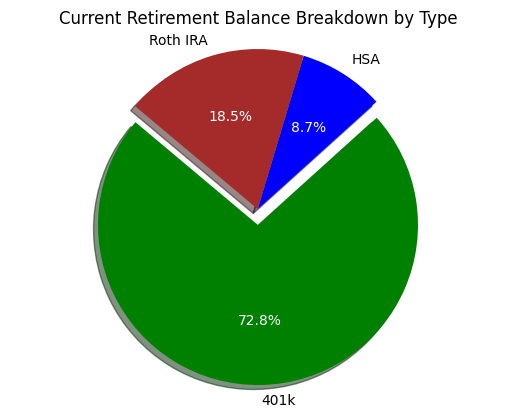

In [3]:
current_balance_df = ReportsClass.get_end_of_year_total_retirement_balance(year=2024)
df = current_balance_df.groupby(['Type']).agg(Balances=('Balance', 'sum')).reset_index()
pie_chart_balance_breakdown(df)

### Pre Tax Vrs Post Tax Money

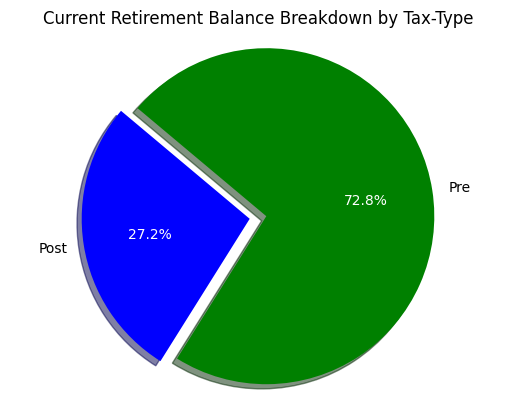

In [4]:
current_balance_df = current_balance_df.copy()  # Create a copy of the DataFrame
current_balance_df['Tax-Type'] = current_balance_df['Type'].apply(lambda x: 'Post' if 'Roth' in x or x == 'HSA' else 'Pre')
df = current_balance_df.groupby(['Tax-Type']).agg(Balances=('Balance', 'sum')).reset_index()
pie_chart_balance_breakdown(df, by_column='Tax-Type')